In [80]:
import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt

#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv
import pickle 

In [81]:
%run custom_functions.ipynb

## Data Visualization

In [82]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


In [83]:
# cloud_mask = np.array(Image.open("visualizations/twitter_white.png"))

In [66]:

twitter_mask = imread('visualizations/twitter_clipart.png', flatten=True)

In [84]:
twitter_mask = imread('visualizations/speech_bubble.jpg', flatten=True)

In [52]:
twitter_mask = imread('visualizations/speechbubble.png', flatten=True)

In [86]:
twitter_mask = imread('visualizations/speech3.png', flatten=True)

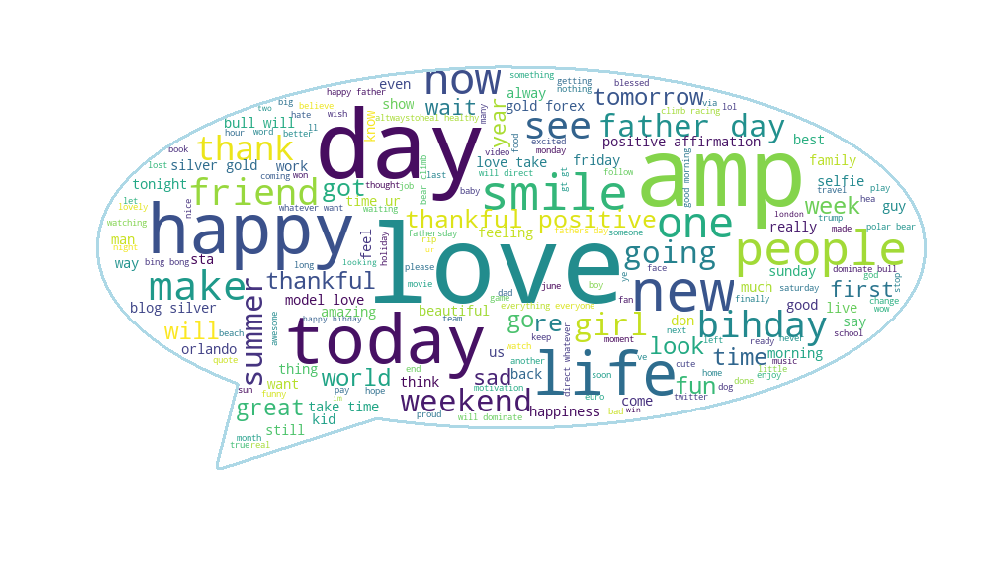

In [87]:
df_0_words = ' '.join([text for text in df['no_hash_tweet'][df['label']==0]])
wordcloud_0 = WordCloud(mask = twitter_mask, contour_color = 'lightblue',
                       width=800, height=500, background_color= 'white',  
                      margin=1, max_font_size=110, contour_width=2, collocations='false',
                      relative_scaling = 1, random_state=10 ).generate(df_0_words)

plt.figure(figsize=(17, 12))
plt.imshow(wordcloud_0, interpolation="nearest", aspect="equal")
plt.axis('off')
plt.show()
wordcloud_0.to_file('visualizations/wordcloud0.jpg')

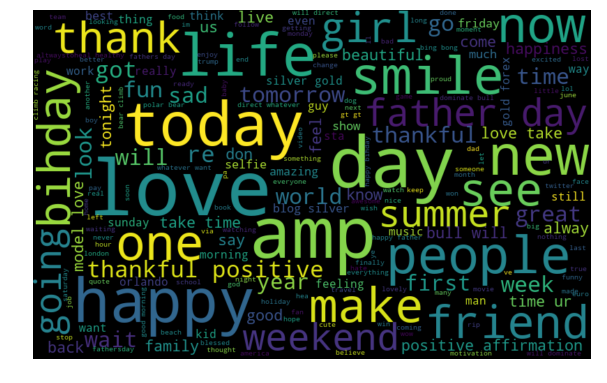

In [56]:
df_0_words = ' '.join([text for text in df['tidy_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, background_color ='black', margin=1,
                      random_state=10, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
df_0_words

'scenes hooligans #engrus spoil #euro #gooddyeyoung #yoyoyo super happy movement queen evil bihday #lnic #lnicjustanevilbday #bihday #suit #evil #love #yolo #stoops #seriously what your goals find here #smile retweets #nuascannan classic trump follower mixture emotions here from weekend #pride meps bear that travelled sandy hook with hope that another massacre would never occur again just because affected abuse prompts angela kennedy change stance thomas always says live dream world this real life just might seem like dream others life #blessed when local library tries charge once again fees already paid twice before #ineedtosavethereceipt #frustrated #cia #ncs #sockpuppetarmy #hbgary troll #snowden their #sop logical fallacies saying year anniversary michael jackson vindication #the happiest michael jackson fans over everyone that says cringe cool amirite #twitch ontwitch #gaming #rant good morning #life #blackhair #travel #home #cheltenham #hamburg #hamburgcity #london talk food ever

In [92]:
# import collections
# collections.Counter(str(df.tokenized_tweet))

Counter({'0': 6,
         ' ': 952,
         '[': 60,
         's': 120,
         'a': 185,
         'd': 59,
         ',': 356,
         't': 157,
         'o': 141,
         'e': 202,
         'h': 84,
         'c': 45,
         'n': 96,
         'f': 41,
         'l': 93,
         'i': 108,
         'g': 45,
         'p': 48,
         'r': 110,
         '.': 144,
         '\n': 61,
         '1': 47,
         'y': 63,
         'u': 64,
         'b': 50,
         '2': 17,
         'q': 1,
         'v': 20,
         'j': 8,
         '3': 45,
         'm': 55,
         'w': 33,
         '4': 16,
         ']': 13,
         '5': 16,
         '6': 9,
         '7': 6,
         'x': 4,
         '8': 6,
         '9': 37,
         'k': 19,
         'z': 2,
         'N': 1,
         ':': 3,
         '_': 1,
         'L': 1})

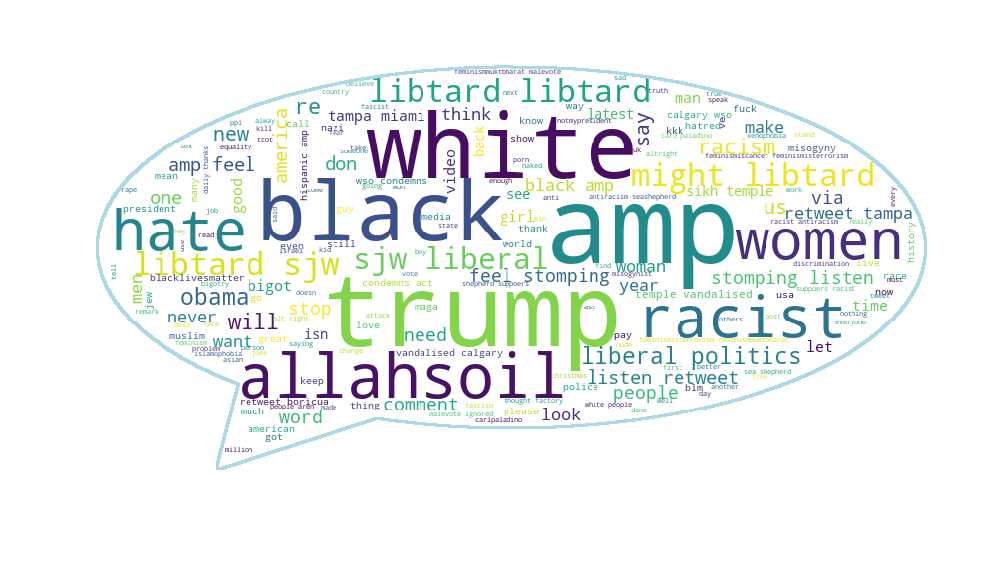

In [89]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud1 = WordCloud(mask = twitter_mask, contour_color = 'lightblue',
                      width=800, height=500, background_color= 'white',
                      margin=1, max_font_size=110, contour_width = 4, collocations='false',
                      random_state=10 ).generate(df_1_words)

plt.figure(figsize=(17, 12))
plt.imshow(wordcloud1, interpolation="nearest", aspect="equal")
plt.axis('off')
plt.show()
wordcloud1.to_file('visualizations/wordcloud1.jpg')

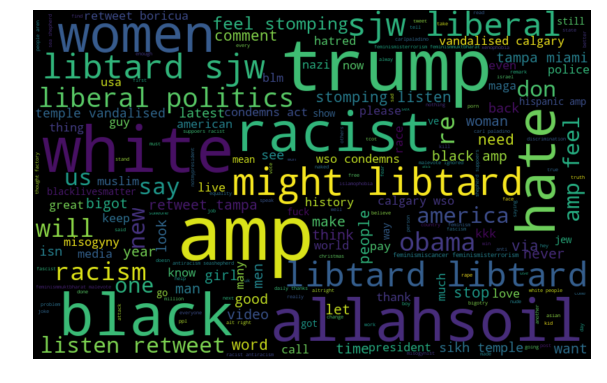

In [54]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
df_1_words

'you might be a libtard if #libtard #sjw #liberal #politics rise up today is out stories of police brutality from #police ouch woow #sexy vandals turned a jewish family s menorah into a swastika #antisemitism #hate the reality is that the tech industry is made of regular ass people #tech #discrimination ways #facebook s #repoingsystem fails its #communitystandards its users by #blacklivesmatter prison officers goaded #muslim inmates until they needed to be restrained as pa of a game i have to say i love me some even if is against #mexicans #lmao the latest science u can use daily thanks to trump real estate buddy carl paladino wishes obama dead of mad cow disease in that is why is systemic rather than just humanity being human it is power and reinforced each minute he s an unamerican #fact your people would have all died of scurvy their first winter if the first nations hadn t shown them a cute #feminismiscancer #feminismisterrorism #feminismmuktbharat why #malevote is ignored you are 

In [612]:
# function to collect hashtags
def hashtag_extract(tweet):
    hashtags = []
    # Loop over the words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)

    return hashtags

In [613]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet_2'][df['label']==0])

# extracting hashtags from racist/sexist tweets
HT_1 = hashtag_extract(df['tidy_tweet_2'][df['label']==1])


In [614]:
HT_0

[['engrus', 'euro'],
 ['gooddyeyoung', 'yoyoyo'],
 ['lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['smile'],
 ['nuascannan'],
 [],
 ['pride'],
 [],
 [],
 ['blessed'],
 ['ineedtosavethereceipt', 'frustrated'],
 ['cia', 'ncs', 'sockpuppetarmy', 'hbgary', 'snowden', 'sop'],
 ['the'],
 ['twitch', 'gaming', 'rant'],
 ['life',
  'blackhair',
  'travel',
  'home',
  'cheltenham',
  'hamburg',
  'hamburgcity',
  'london'],
 ['everycharactermatters'],
 ['lightroom'],
 ['udtapunjab', 'amarinder', 'aap'],
 [],
 ['love',
  'nature',
  'beauty',
  'garden',
  'outdoors',
  'pretty',
  'cute',
  'lovely',
  'beautiful',
  'fun',
  'water',
  'sun',
  'life',
  'inst'],
 [],
 ['pretty'],
 ['bigbiz', 'venezuela'],
 ['sacs',
  'photooftheday',
  'music',
  'instamood',
  'photography',
  'instadaily',
  'nike',
  'family',
  'design'],
 [],
 ['fun',
  'bekindalways',
  'animation',
  'bekindtoanimals',
  'recycling',
  'forests'],
 [],


In [76]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])

In [77]:
HT_0

['engrus',
 'euro',
 'gooddyeyoung',
 'yoyoyo',
 'lnic',
 'lnicjustanevilbday',
 'bihday',
 'suit',
 'evil',
 'love',
 'yolo',
 'stoops',
 'seriously',
 'smile',
 'nuascannan',
 'pride',
 'blessed',
 'ineedtosavethereceipt',
 'frustrated',
 'cia',
 'ncs',
 'sockpuppetarmy',
 'hbgary',
 'snowden',
 'sop',
 'the',
 'twitch',
 'gaming',
 'rant',
 'life',
 'blackhair',
 'travel',
 'home',
 'cheltenham',
 'hamburg',
 'hamburgcity',
 'london',
 'everycharactermatters',
 'lightroom',
 'udtapunjab',
 'amarinder',
 'aap',
 'love',
 'nature',
 'beauty',
 'garden',
 'outdoors',
 'pretty',
 'cute',
 'lovely',
 'beautiful',
 'fun',
 'water',
 'sun',
 'life',
 'inst',
 'pretty',
 'bigbiz',
 'venezuela',
 'sacs',
 'photooftheday',
 'music',
 'instamood',
 'photography',
 'instadaily',
 'nike',
 'family',
 'design',
 'fun',
 'bekindalways',
 'animation',
 'bekindtoanimals',
 'recycling',
 'forests',
 'puppy',
 'cute',
 'morning',
 'breakfast',
 'yum',
 'foodporn',
 'greece',
 'firstcoffee',
 'milos',


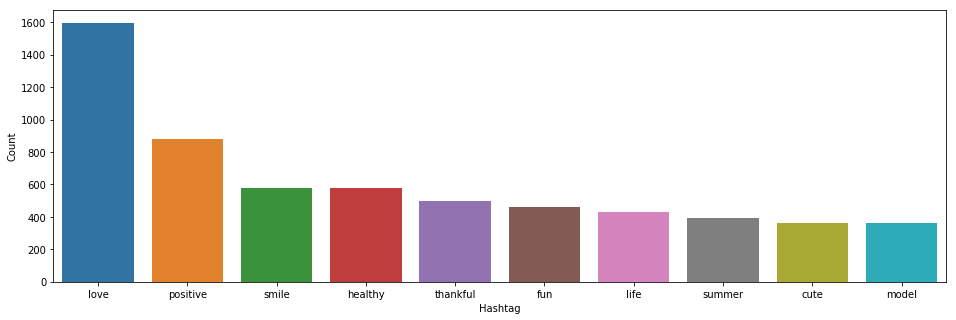

In [78]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

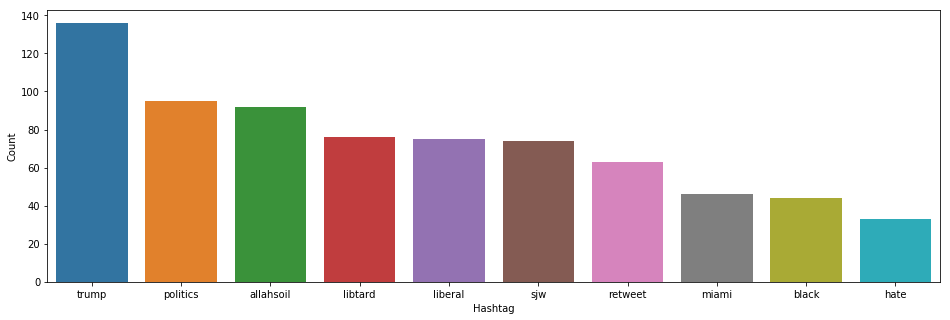

In [79]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [80]:
meta_freqdist = FreqDist(HT_1)
meta_freqdist.most_common(10)

[('trump', 136),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 33)]

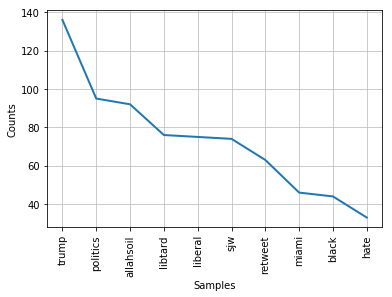

In [81]:
meta_freqdist.plot(10,cumulative=False)

In [82]:
meta_freqdist = FreqDist(HT_0)
meta_freqdist.most_common(10)

[('love', 1596),
 ('positive', 880),
 ('smile', 581),
 ('healthy', 576),
 ('thankful', 496),
 ('fun', 463),
 ('life', 431),
 ('summer', 395),
 ('cute', 365),
 ('model', 365)]

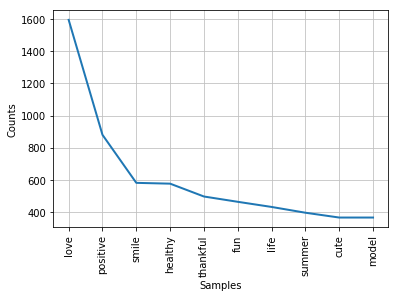

In [83]:
meta_freqdist.plot(10,cumulative=False)

## Bigram

In [77]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['no_hash_tweet'])


In [78]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


In [79]:
bigram_scored

[(('model i love u take with u all the time in ur',
   'model i love u take with u all the time in ur'),
  0.00012514861397910017),
 (('you might be a libtard if libtard sjw liberal politics',
   'i finally found a way how to delete old tweets you might find it useful as well deletetweets'),
  9.386146048432514e-05),
 (('i am thankful for tears thankful positive',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('i finally found a way how to delete old tweets you might find it useful as well deletetweets',
   'vehicle gorilla simulator you need to do to adapt to the environment the need to tear the city materia'),
  6.257430698955009e-05),
 (('model i love u take with u all the time in ur',
   'i m so and grateful now that affirmations'),
  6.257430698955009e-05),
 (('parente bull up you will dominate your bull and you will direct it whatever you want it to do when you',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('

## Word 2 Vec Exploration

In [64]:
w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [72]:
w2v.wv.most_similar(['men'])

[('non', 0.8077213168144226),
 ('complaining', 0.7993943095207214),
 ('thinks', 0.7916132211685181),
 ('women', 0.7886711359024048),
 ('gators', 0.7877092957496643),
 ('responsible', 0.7873397469520569),
 ('binds', 0.7855310440063477),
 ('anyone', 0.7843775749206543),
 ('brown', 0.7817881107330322),
 ('grandpa', 0.7800185084342957)]

In [69]:
w2v.wv.most_similar(['women'])

[('men', 0.7886711359024048),
 ('non', 0.7800412178039551),
 ('suppoers', 0.7779800891876221),
 ('pageant', 0.7715924978256226),
 ('deplorable', 0.7653487920761108),
 ('sexual', 0.7641636729240417),
 ('officer', 0.7574792504310608),
 ('fake', 0.7542891502380371),
 ('groups', 0.7536261081695557),
 ('fat', 0.7531337141990662)]

In [76]:
w2v.wv.most_similar(positive=['white'], negative=['color'])

[('racist', 0.2770112156867981),
 ('trump', 0.24265965819358826),
 ('angry', 0.23284977674484253),
 ('young', 0.21328160166740417),
 ('nowumameshigoodtastybeefporklocalshopgoodkuonfeek', 0.21114477515220642),
 ('obama', 0.19466736912727356),
 ('black', 0.18971633911132812),
 ('tcot', 0.18410490453243256),
 ('dead', 0.17397019267082214),
 ('p', 0.16978254914283752)]

In [ ]:
w2v.wv.most_similar(positive=['black'], negative=['color'])

In [68]:
w2v.wv.most_similar(positive=['lazy','black'])

[('scum', 0.9114672541618347),
 ('brown', 0.9058009386062622),
 ('interesting', 0.9045734405517578),
 ('dating', 0.9045312404632568),
 ('chick', 0.8953752517700195),
 ('assholes', 0.8941750526428223),
 ('crayon', 0.8936958312988281),
 ('disabled', 0.8926042318344116),
 ('fool', 0.8924901485443115),
 ('donate', 0.8906980752944946)]